# PLANTILLA MODELIZACIÓN PARA NO SUPERVISADO

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de k a testar
* Reducir el número de repeticiones de n_init

## IMPORTAR PAQUETES

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [39]:
ruta_proyecto = '../..'

Nombres de los ficheros de datos.

In [40]:
nombre_x = 'x_final.pickle'
nombre_y = 'y_final.pickle'

Cargar los datos.

In [41]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [42]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el espacio de soluciones

In [43]:
min_k = 5
max_k = 10

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [44]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [21]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(train_x)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(train_x, cluster.labels_))
    calins.append(calinski_harabasz_score(train_x, cluster.labels_))
    davies.append(davies_bouldin_score(train_x, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [22]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

Codo  Silueta   Calins  Davies
Solucion                                   
5        10923.52     0.73 34846.35    0.44
6         7136.47     0.74 44093.28    0.35
7         5144.58     0.67 51834.48    0.41
8         3708.20     0.69 62378.30    0.37
9         2748.67     0.70 74215.22    0.33

#### Analizar los gráficos

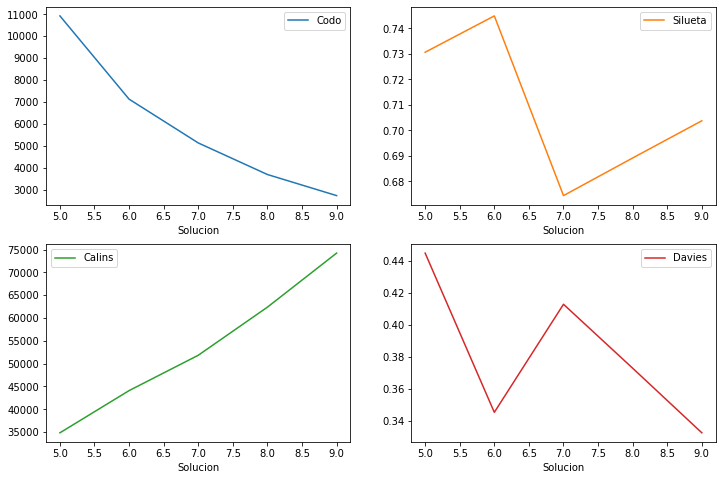

In [23]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [45]:
mejor_solucion = 7

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(train_x)

KMeans(n_clusters=7)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [46]:
train_x['segmento'] = cluster.predict(train_x)

In [47]:
val_x['segmento'] = cluster.predict(val_x)

### Comparar los perfiles

#### Calcular los perfiles

In [85]:
perfiles_train = train_x.groupby('segmento').mean().T.stack().reset_index()
perfiles_train.columns = ['variable','segmento','media']

perfiles_val = val_x.groupby('segmento').mean().T.stack().reset_index()
perfiles_val.columns = ['variable','segmento','media']

#### Comparar los perfiles

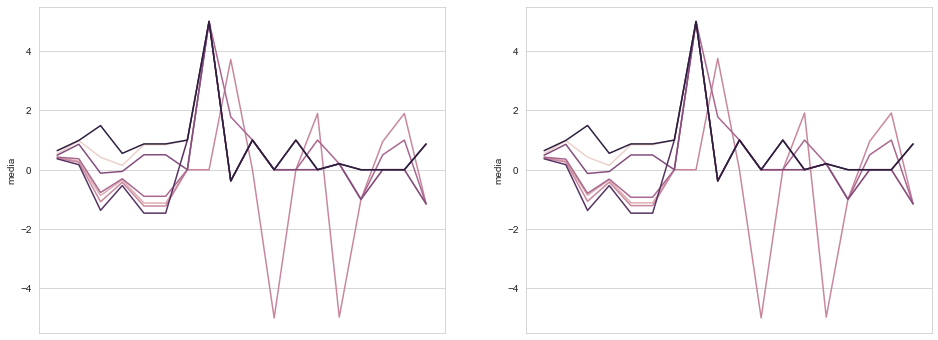

In [88]:
sns.set_style("whitegrid")

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

sns.lineplot(ax = ax[0], data = perfiles_train, x = 'variable', y = 'media', hue = 'segmento')
ax[0].get_legend().remove()
ax[0].axes.xaxis.set_visible(False)

sns.lineplot(ax = ax[1], data = perfiles_val, x = 'variable', y = 'media', hue = 'segmento')
ax[1].get_legend().remove()
ax[1].axes.xaxis.set_visible(False)

## PERFILAR LOS SEGMENTOS

In [102]:
train_x.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)